In [26]:
import numpy as np
import sys
import os

module_path = os.path.join(os.getcwd(), '../modules')
sys.path.append(module_path)
from mlp import MLP, CompoundNN
from activation_functions import ReLU
from losses import MSELoss

import matplotlib.pyplot as plt

In [42]:
mlp1 = MLP(6, 5)
relu1 = ReLU()
mlp2 = MLP(5, 4)

nn = CompoundNN([mlp1, relu1, mlp2])

target = np.array([[1.,2.,3.,4.]]) # isso é o que queremos que a rede aprenda
x = np.random.rand(1, 6)
NB_EPOCHS = 100

training_loss = []
initial_pred = nn.forward(x)

for i in range(NB_EPOCHS):

    loss_fct = MSELoss()

    # Forward pass
    prediciton = nn.forward(x)
    loss_value = loss_fct.forward(prediciton, target) # compute loss
    training_loss.append(loss_value)
    gradout = loss_fct.backward() # compute gradient
    nn.backward(gradout)

    # update weights
    mlp1.W = mlp1.W - mlp1.deltaW
    mlp1.b = mlp1.b - mlp1.deltaB

    mlp2.W = mlp2.W - mlp2.deltaW
    mlp2.b = mlp2.b - mlp2.deltaB

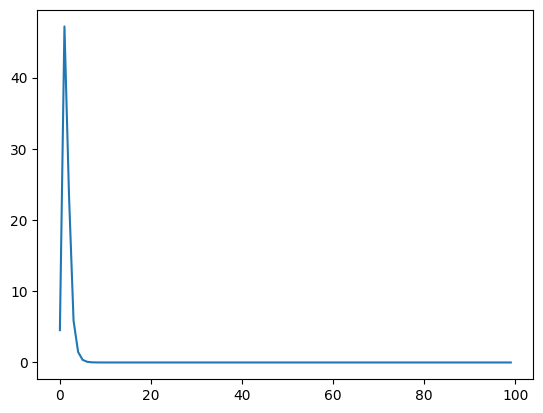

In [45]:
plt.plot(training_loss)

In [44]:
print(initial_pred)
print(prediciton)
print(target)

[[-1.545077    1.05671863  0.66960192  1.68548902]]
[[1. 2. 3. 4.]]
[[1. 2. 3. 4.]]


In [31]:
training_loss[-1]#ultimo valor da lista

0.0

In [46]:
print(mlp1.W)

[[ -1.08048188  -2.09081367  -0.67577338  -1.38393956   0.6996484
   -1.40400349]
 [ -1.11176812  -9.09780983   0.26184654  -3.21822382  -2.96334668
   -4.87886296]
 [ -0.0914679   -0.26617886   1.78057631  -0.82397985  -2.18261085
   -1.29379481]
 [ -2.65285209 -17.68453552  -1.74045245  -7.00028853  -4.50222651
   -8.27650012]
 [  0.90413605   1.09132854  -0.37251527  -1.70535519   3.43168885
   -0.40978648]]
